 Загрузить данные из файла “ECDCCases.csv”

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import scipy.stats as sts
warnings.filterwarnings('ignore')

In [76]:
data = pd.read_csv('ECDCCases.csv', sep=',')
print(data.head())
data.isnull().sum()

      dateRep  day  month  year  cases  deaths countriesAndTerritories geoId  \
0  14/12/2020   14     12  2020    746       6             Afghanistan    AF   
1  13/12/2020   13     12  2020    298       9             Afghanistan    AF   
2  12/12/2020   12     12  2020    113      11             Afghanistan    AF   
3  12/12/2020   12     12  2020    113      11             Afghanistan    AF   
4  11/12/2020   11     12  2020     63      10             Afghanistan    AF   

  countryterritoryCode  popData2019 continentExp  \
0                  AFG   38041757.0         Asia   
1                  AFG   38041757.0         Asia   
2                  AFG   38041757.0         Asia   
3                  AFG   38041757.0         Asia   
4                  AFG   38041757.0         Asia   

   Cumulative_number_for_14_days_of_COVID-19_cases_per_100000  
0                                           9.013779           
1                                           7.052776           
2             

dateRep                                                          0
day                                                              0
month                                                            0
year                                                             0
cases                                                            0
deaths                                                           0
countriesAndTerritories                                          0
geoId                                                          275
countryterritoryCode                                           123
popData2019                                                    123
continentExp                                                     0
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    2879
dtype: int64

In [77]:
data.isnull().sum()
print((data.isnull().sum() / len(data) * 100).round(2))
data.drop(['Cumulative_number_for_14_days_of_COVID-19_cases_per_100000', 'geoId'], axis=1, inplace=True)
data['countryterritoryCode'].fillna('other', inplace=True)
data['popData2019'].fillna(data['popData2019'].median(), inplace=True)
print(data.isnull().sum())



dateRep                                                       0.00
day                                                           0.00
month                                                         0.00
year                                                          0.00
cases                                                         0.00
deaths                                                        0.00
countriesAndTerritories                                       0.00
geoId                                                         0.44
countryterritoryCode                                          0.20
popData2019                                                   0.20
continentExp                                                  0.00
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    4.65
dtype: float64
dateRep                    0
day                        0
month                      0
year                       0
cases                      0
deaths                     0
countri

Кол-во дней
 countriesAndTerritories
Argentina                   1
Ecuador                     1
Mexico                      1
Peru                        2
United_States_of_America    6
Name: deaths, dtype: int64
                day         month          year          cases        deaths  \
count  61904.000000  61904.000000  61904.000000   61904.000000  61904.000000   
mean      15.629232      7.067104   2019.998918    1155.079026     26.053987   
std        8.841624      2.954816      0.032881    6779.010824    131.222948   
min        1.000000      1.000000   2019.000000   -8261.000000  -1918.000000   
25%        8.000000      5.000000   2020.000000       0.000000      0.000000   
50%       15.000000      7.000000   2020.000000      15.000000      0.000000   
75%       23.000000     10.000000   2020.000000     273.000000      4.000000   
max       31.000000     12.000000   2020.000000  234633.000000   4928.000000   

        popData2019  
count  6.190400e+04  
mean   4.091909e+07  

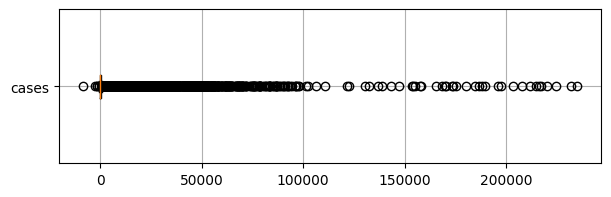

In [78]:
print('Кол-во дней\n',data[data['deaths'] > 3000].groupby('countriesAndTerritories')['deaths'].count())
print(data.describe())

plt.figure(figsize=(7, 2))
plt.boxplot(data['cases'], labels=['cases'], vert=False)
plt.grid()
plt.show()


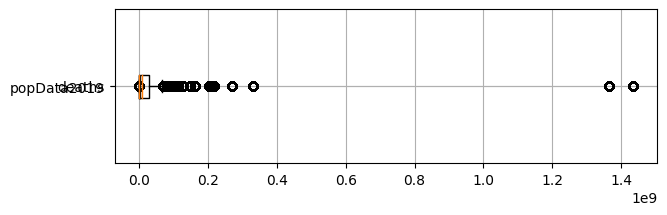

In [79]:
plt.figure(figsize=(7, 2))
plt.boxplot(data['deaths'], labels=['deaths'], vert = False)
plt.boxplot(data['popData2019'], labels=['popData2019'], vert = False)
plt.grid()
plt.show()

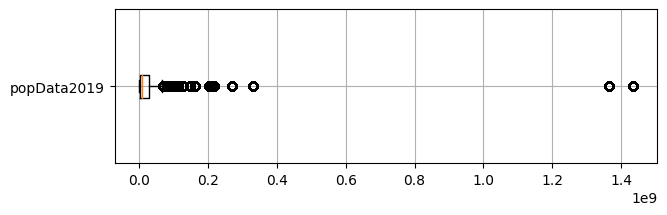

In [80]:
plt.figure(figsize=(7, 2))
plt.boxplot(data['popData2019'], labels=['popData2019'], vert = False)
plt.grid()
plt.show()

In [86]:

count = data.duplicated().sum()
data.drop_duplicates(inplace=True)

print(data.duplicated().sum())


0


In [82]:
data = pd.read_csv('bmi.csv', sep=',')
data_northwest = data[data['region'] == 'northwest']
data_southwest = data[data['region'] == 'southwest']
stat, p = sts.shapiro(data_northwest['bmi'])
print('northwest statistics=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Выборка нормальна')
else:
    print('Выборка не нормальна')

stat, p = sts.shapiro(data_southwest['bmi'])
print('southwest statistics=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Выборка нормальна')
else:
    print('Выборка не нормальна')


stat, p = sts.bartlett(data_northwest['bmi'], data_southwest['bmi'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Дисперсии равны')
else:
    print('Дисперсии не равны')

t_res = sts.ttest_ind(data_northwest['bmi'], data_southwest['bmi'])
if t_res.pvalue < 0.05:
    print('Средние значения не равны')
else:
    print('Средние значения равны')



northwest statistics=0.995, p=0.466
Выборка нормальна
southwest statistics=0.995, p=0.363
Выборка нормальна
Statistics=3.400, p=0.065
Дисперсии равны
Средние значения не равны


In [83]:

result = {
    '1': 97,
    '2': 98,
    '3': 109,
    '4': 95,
    '5': 97,
    '6': 104
}

observed = np.array(list(result.values()))
expected = np.array([100, 100, 100, 100, 100, 100])

data = pd.DataFrame({'points':result.keys(),'observed': observed, 'expected': expected})

chisquare_result = sts.chisquare(data['observed'], data['expected'])
if(chisquare_result.pvalue < 0.05):
    print('Распределение не равномерно')
else:
    print('Распределение равномерно')

chi2_contingency_result = sts.chi2_contingency(data[['observed', 'expected']])
if(chi2_contingency_result[1] < 0.05):
    print('Переменные зависимы')
else:
    print('Переменные не зависимы')






Распределение равномерно
Переменные не зависимы


In [84]:

data = pd.DataFrame({'Женат': [89,17,11,43,22,1],
 'Гражданский брак': [80,22,20,35,6,4],
 'Не состоит в отношениях': [35,44,35,6,8,22]})
data.index = ['Полный рабочий день','Частичная занятость','Временно не работает','На домохозяйстве','На пенсии','Учёба']

chi2_contingency_result = sts.chi2_contingency(data)
if(chi2_contingency_result[1] < 0.05):
    print('Переменные зависимы')
else:
    print('Переменные не зависимы')






Переменные зависимы
